In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score
import pandas as pd
import seaborn as sns
from statsmodels import api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
import os
import numpy as np
import math
import validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import PR_curve

In [9]:
data_dir='fixed_csv_label_ver2'
df = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
df=df[df['day']<=9]
df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [11]:
data_dir='csv_label'
bef_df = pd.read_csv( os.path.join(data_dir, 'learning_data_10.csv') )
bef_df=bef_df[bef_df['day']<=9]
bef_df

,original,label,time,day
0,53.4,0,15,0
1,52.8,0,15,0
2,52.8,0,15,0
3,53.2,0,15,0
4,53.6,0,15,0
...,...,...,...,...
3995345,45.9,0,5,9
3995346,45.6,0,5,9
3995347,45.8,0,5,9
3995348,45.7,0,5,9


In [12]:
print('修正前')
for i in bef_df['day'].unique():
    bef_day=bef_df[bef_df['day']==i]
    bef_ratio=len(bef_day[bef_day['label']==1])/len(bef_day)
    print(f'{i}日目異常割合：{bef_ratio}')

修正前
0日目異常割合：0.011173999097190874
1日目異常割合：0.05496982451258327
2日目異常割合：0.018190446427537994
3日目異常割合：0.020815365485859414
4日目異常割合：0.09868049446733645
5日目異常割合：0.005023322569070686
6日目異常割合：0.00846424156562079
7日目異常割合：0.3724820947618875
8日目異常割合：0.315325434496419
9日目異常割合：0.324014155102238


In [13]:
print('csvラベル修正後')
for i in df['day'].unique():
    day=df[df['day']==i]
    ratio=len(day[day['label']==1])/len(day)
    print(f'{i}日目異常割合：{ratio}')

csvラベル修正後
0日目異常割合：0.03312152042316284
1日目異常割合：0.08984120910656208
2日目異常割合：0.03869810294338924
3日目異常割合：0.03335802534458584
4日目異常割合：0.1073267280892634
5日目異常割合：0.02060951190434853
6日目異常割合：0.015342305929413725
7日目異常割合：0.3824462238970011
8日目異常割合：0.3264514414773482
9日目異常割合：0.3381716728866988


In [11]:
change_df=pd.read_csv('change_df.csv')
detect_df=pd.read_csv('detect_df.csv')

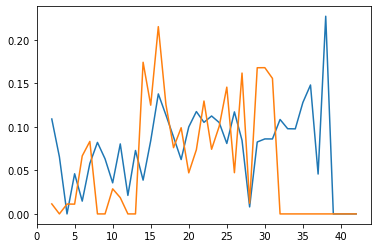

In [12]:
plt.plot(detect_df['0'].pct_change(1))
plt.plot(detect_df['1'].pct_change(1))


(0.0, 2000.0)

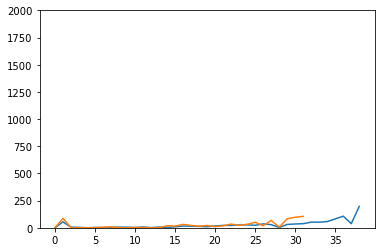

In [13]:
plt.plot(change_df['0'])
plt.plot(change_df['1'])
plt.ylim(0, 2000)

(0.0, 2000.0)

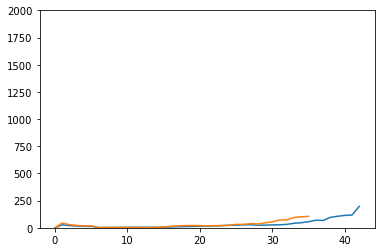

In [14]:
plt.plot(change_df.rolling(5, min_periods=1).mean()['0'])
plt.plot(change_df.rolling(5, min_periods=1).mean()['1'])
plt.ylim(0, 2000)

(0.0, 2000.0)

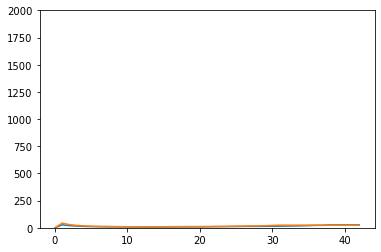

In [15]:
plt.plot(change_df.expanding().mean()['0'])
plt.plot(change_df.expanding().mean()['1'])
plt.ylim(0, 2000)

(0.0, 2000.0)

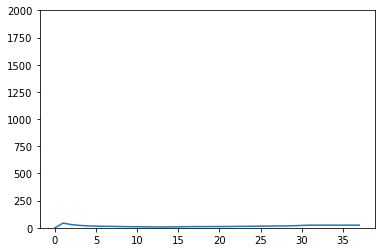

In [16]:
plt.plot(change_df[:38]['1'].expanding().mean())
plt.plot(change_df[38:]['1'].expanding().mean())
plt.ylim(0, 2000)

(0.0, 2000.0)

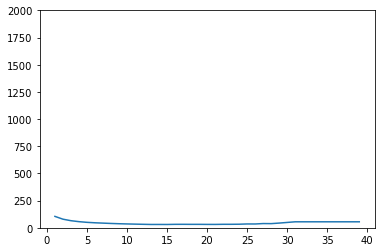

In [17]:
plt.plot(change_df[:40]['1'].expanding().mean()+change_df[:40]['1'].expanding().std())
plt.plot(change_df[40:]['1'])
plt.ylim(0, 2000)

In [18]:
change_df[:40]['1'].expanding().mean()+change_df[:40]['1'].expanding().std()

0            NaN
1     105.018290
2      79.276635
3      65.335897
4      56.487207
5      50.276054
6      46.095938
7      43.047581
8      39.994574
9      37.460426
10     35.495823
11     33.753736
12     32.138697
13     30.717649
14     30.819994
15     30.611725
16     31.889154
17     32.075610
18     31.714762
19     31.779253
20     31.239130
21     31.104599
22     32.181136
23     32.228821
24     32.953891
25     35.361328
26     35.118734
27     39.033490
28     38.355972
29     43.398973
30     49.302738
31     55.193657
32     55.193657
33     55.193657
34     55.193657
35     55.193657
36     55.193657
37     55.193657
38     55.193657
39     55.193657
Name: 1, dtype: float64

<AxesSubplot:>

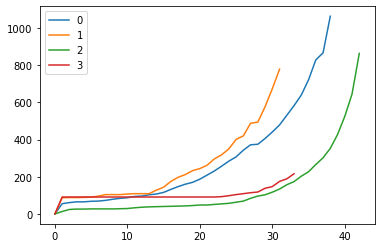

In [19]:
detect_df.plot()